In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv

In [2]:
dataset = 'Neuron_scNT'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
adata.obs['clusters'] = adata.obs['time'].astype(str)

In [ ]:
#genes_retain = ['Jun','Fos','Srf','Maff','Bhlhe40','Fosb','Egr4','Egr1','Egr2','Mef2d',\
#                'Cebpb','Rfx3','Hspa5','Pou3f1','Rfxap','Klf9','Cebpg','Klf16']
#vv.preprocess(adata, n_gene=2000, gene_retain=genes_retain, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}_notime'
figure_path_base = f'{root}/figures/{dataset}_notime'
data_path = f'{root}/data/velovae/discrete/{dataset}_notime'
gene_plot = ['Fosb','Rfx3','Cebpg','Homer1']

# Informative Time Prior

In [4]:
adata.obs['tprior'] = adata.obs['time'].to_numpy().astype(float)

# Discrete VeloVAE

In [6]:
figure_path = f'{figure_path_base}/DVAE'
model_path = f'{model_path_base}/DVAE'

torch.manual_seed(2022)
np.random.seed(2022)
dvae = vv.VAE(adata, 
              tmax=20, 
              dim_z=5, 
              device='cuda:0',
              discrete=True,
              init_method='tprior',
              init_key='tprior',
              tprior=None,
              init_ton_zero=False)

dvae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

dvae.save_model(model_path, 'encoder', 'decoder')
dvae.save_anndata(adata, 'dvae', data_path, file_name=f'{dataset}.h5ad')

Detecting zero scaling factors: 0, 0
Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 34 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 431, repression: 569/1000
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 968.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/3066 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.061
Average Set Size: 77
*********     Round 1: Early Stop Triggered at epoch 1010.    *********
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1044.    *********
Change in x0: 0.7087
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1052.    *********
Change in x0: 0.6119
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1485.    *********
Change in x0: 0.5104
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1508.    *********
Change in x0: 0.7378
*********             Velocity Refinement Round 6             *********
Stage 2: Early Stop Triggered at round 5.
*********              Finished. Total Time =   0 h :  6 m : 52 s             *********
Final: Trai

# Discrete Full VB

In [7]:
figure_path = f'{figure_path_base}/DFullVB'
model_path = f'{model_path_base}/DFullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 discrete=True,
                 full_vb=True,
                 init_method='tprior',
                 init_key='tprior',
                 tprior=None,
                 init_ton_zero=False)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'dfullvb', data_path, file_name=f'{dataset}.h5ad')

Detecting zero scaling factors: 0, 0
Estimating ODE parameters...


  0%|          | 0/1000 [00:00<?, ?it/s]

Detected 34 velocity genes.
Estimating the variance...


  0%|          | 0/1000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/1000 [00:00<?, ?it/s]

Initial induction: 431, repression: 569/1000
Learning Rate based on Data Sparsity: 0.0001
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 17, test iteration: 32
*********       Stage 1: Early Stop Triggered at epoch 821.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/3066 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.065
Average Set Size: 77
*********     Round 1: Early Stop Triggered at epoch 1015.    *********
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1040.    *********
Change in x0: 0.4441
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1048.    *********
Change in x0: 0.3265
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1075.    *********
Change in x0: 0.2699
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1083.    *********
Change in x0: 0.2272
*********             Velocity Refinement Round 6             *********
*********     Round 6: Early Stop Triggered at epoch 1123.    *********
Change in x0: 0.1968
*********             Velocity Refinement Round 

# Evaluation

In [2]:
dataset = 'Neuron_scNT'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/velovae/discrete/{dataset}_notime/{dataset}.h5ad')

computing velocity graph (using 1/36 cores)


  0%|          | 0/3066 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'dfullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'dfullvb_velocity_umap', embedded velocity vectors (adata.obsm)


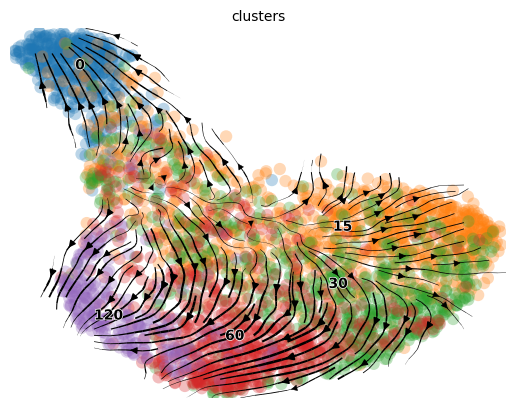

In [3]:
import scvelo as scv
vel_genes = np.load('/scratch/blaauw_root/blaauw1/gyichen/perf/Neuron_scNT_scv_vel_genes.npy')
scv.tl.velocity_graph(adata, vkey='dfullvb_velocity', gene_subset=adata.var_names[vel_genes])
scv.pl.velocity_embedding_stream(adata, vkey='dfullvb_velocity')

['Eprs']
---   Plotting  Results   ---


(None, None)

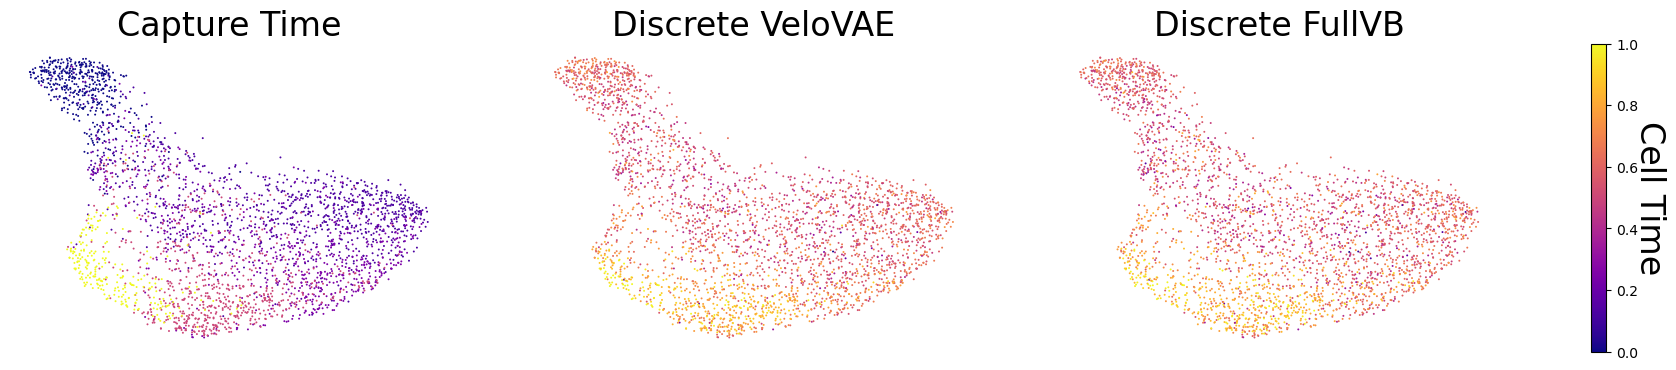

In [4]:
vv.post_analysis(adata,
                 'eval',
                 ['Discrete VeloVAE','Discrete FullVB'],
                 ['dvae','dfullvb'],
                 compute_metrics=False,
                 plot_type=['time'],
                 figure_path=None)